In [45]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('timing_data.csv')
data['Average Time'] = pd.to_numeric(data['Average Time'], errors='coerce')  # Convert to float, coerce errors
data.dropna(subset=['Average Time'], inplace=True)  # Remove any rows that couldn't be converted to numbers


In [47]:
size_order = ['5x5', '10x10', '50x50', '70x100']
data['Maze Size'] = pd.Categorical(data['Maze Size'], categories=size_order, ordered=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


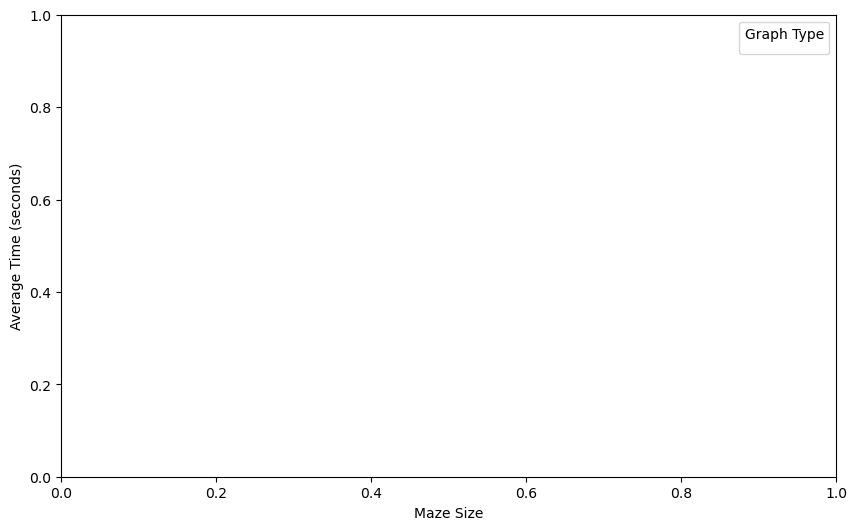

In [48]:
plt.figure(figsize=(10, 6))
for label, group_df in data.groupby('Graph Type'):
    group_df = group_df.groupby('Maze Size')['Average Time'].mean().reindex(size_order)
    plt.plot(group_df.index, group_df.values, label=label, marker='o')
    plt.title('Performance Comparison')
    
plt.xlabel('Maze Size')
plt.ylabel('Average Time (seconds)')
plt.legend(title='Graph Type')
plt.show()
    

In [49]:
df = pd.read_csv('timing_data.csv')

# Filter out the data for 'updateWall' and 'neighbours' functions
df_updateWall = df[df['Function'] == 'updateWall']
df_neighbours = df[df['Function'] == 'neighbours']

# Define the order of the maze sizes
maze_sizes = ['5x5', '10x10', '50x50', '70x100']

# Create a pivot table for each function to plot
pivot_updateWall = df_updateWall.pivot_table(index='Maze Size', columns='Graph Type', values='Average Time', aggfunc='mean')
pivot_neighbours = df_neighbours.pivot_table(index='Maze Size', columns='Graph Type', values='Average Time', aggfunc='mean')

# Sort the pivot tables according to our predefined maze_sizes order
pivot_updateWall = pivot_updateWall.reindex(maze_sizes)
pivot_neighbours = pivot_neighbours.reindex(maze_sizes)

# Now plot the data
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Plot for 'updateWall'
pivot_updateWall.plot(ax=axes[0], marker='o', title='Performance Comparison for updateWall')
axes[0].set_ylabel('Average Time (seconds)')
axes[0].set_xlabel('Maze Size')
axes[0].grid(True)
axes[0].legend(title='Graph Type')

# Plot for 'neighbours'
pivot_neighbours.plot(ax=axes[1], marker='o', title='Performance Comparison for neighbours')
axes[1].set_ylabel('Average Time (seconds)')
axes[1].set_xlabel('Maze Size')
axes[1].grid(True)
axes[1].legend(title='Graph Type')

# Show plot with a tight layout
plt.tight_layout()
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

In [33]:
import ast 
def parse_average_time(time_strings):
    """ Converts a list of time strings to their float equivalents and computes the average. """
    times = [float(time) for time in ast.literal_eval(time_strings)]
    return sum(times) / len(times)

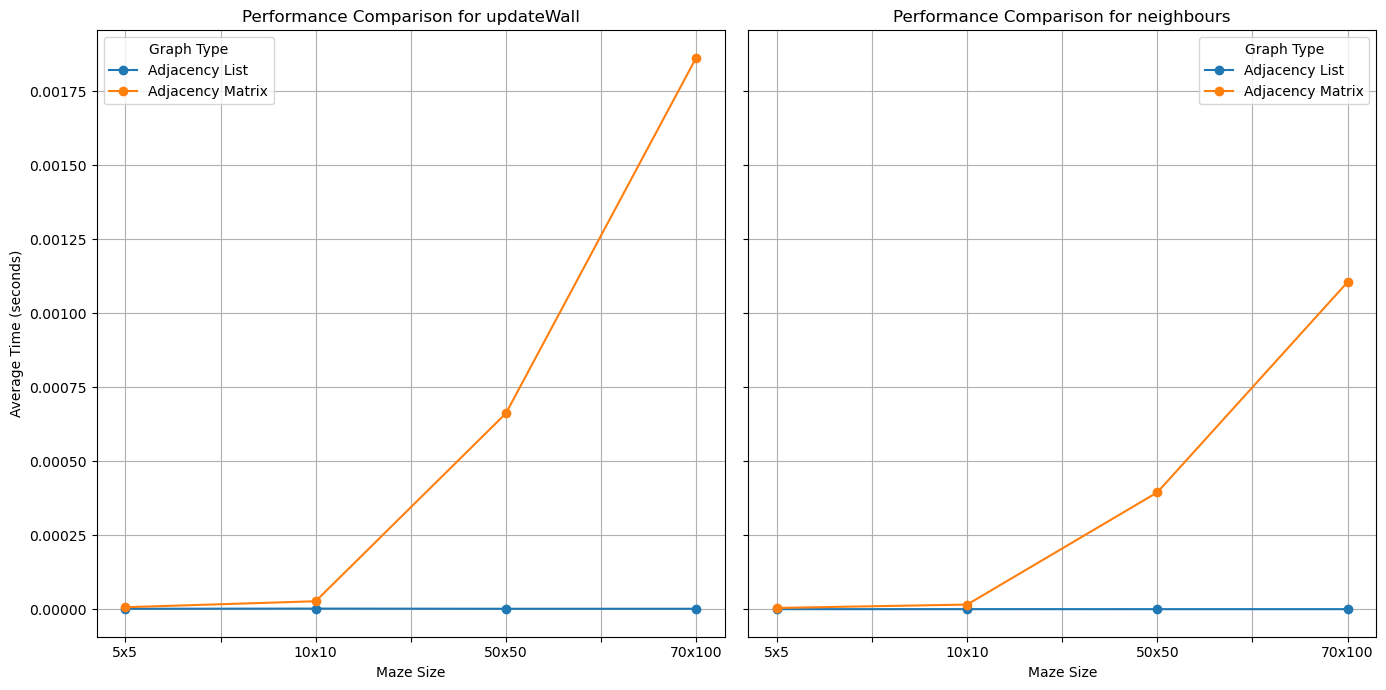

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import ast  # To safely evaluate string literals

# Function to convert string representations of lists into actual lists of floats
def convert_and_average(time_str):
    time_list = ast.literal_eval(time_str)
    return sum(time_list) / len(time_list) if time_list else 0

# Load the data
df = pd.read_csv('timing_data.csv')

# Convert the 'Average Time' column from string to lists and then compute the average
df['Average Time'] = df['Average Time'].apply(convert_and_average)

df['Graph Type'] = df['Graph Type'].map({'ls': 'Adjacency List', 'mt': 'Adjacency Matrix'})


# Define the order of the maze sizes
maze_size_order = ['5x5', '10x10', '50x50', '70x100']
# Convert 'Maze Size' to a categorical type with the specified order
df['Maze Size'] = pd.Categorical(df['Maze Size'], categories=maze_size_order, ordered=True)

# Separate data for 'updateWall' and 'neighbours' functions
df_updateWall = df[df['Function'] == 'updateWall']
df_neighbours = df[df['Function'] == 'neighbours']

# Create pivot tables for 'updateWall' and 'neighbours' functions
pivot_updateWall = df_updateWall.pivot_table(index='Maze Size', columns='Graph Type', values='Average Time', aggfunc='mean')
pivot_neighbours = df_neighbours.pivot_table(index='Maze Size', columns='Graph Type', values='Average Time', aggfunc='mean')

# Now plot the data
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Plot for 'updateWall'
pivot_updateWall.plot(ax=axes[0], marker='o', title='Performance Comparison for updateWall')
axes[0].set_ylabel('Average Time (seconds)')
axes[0].set_xlabel('Maze Size')
axes[0].grid(True)
axes[0].legend(title='Graph Type')

# Plot for 'neighbours'
pivot_neighbours.plot(ax=axes[1], marker='o', title='Performance Comparison for neighbours')
axes[1].set_ylabel('Average Time (seconds)')
axes[1].set_xlabel('Maze Size')
axes[1].grid(True)
axes[1].legend(title='Graph Type')

# Show plot with a tight layout
plt.tight_layout()
plt.show()


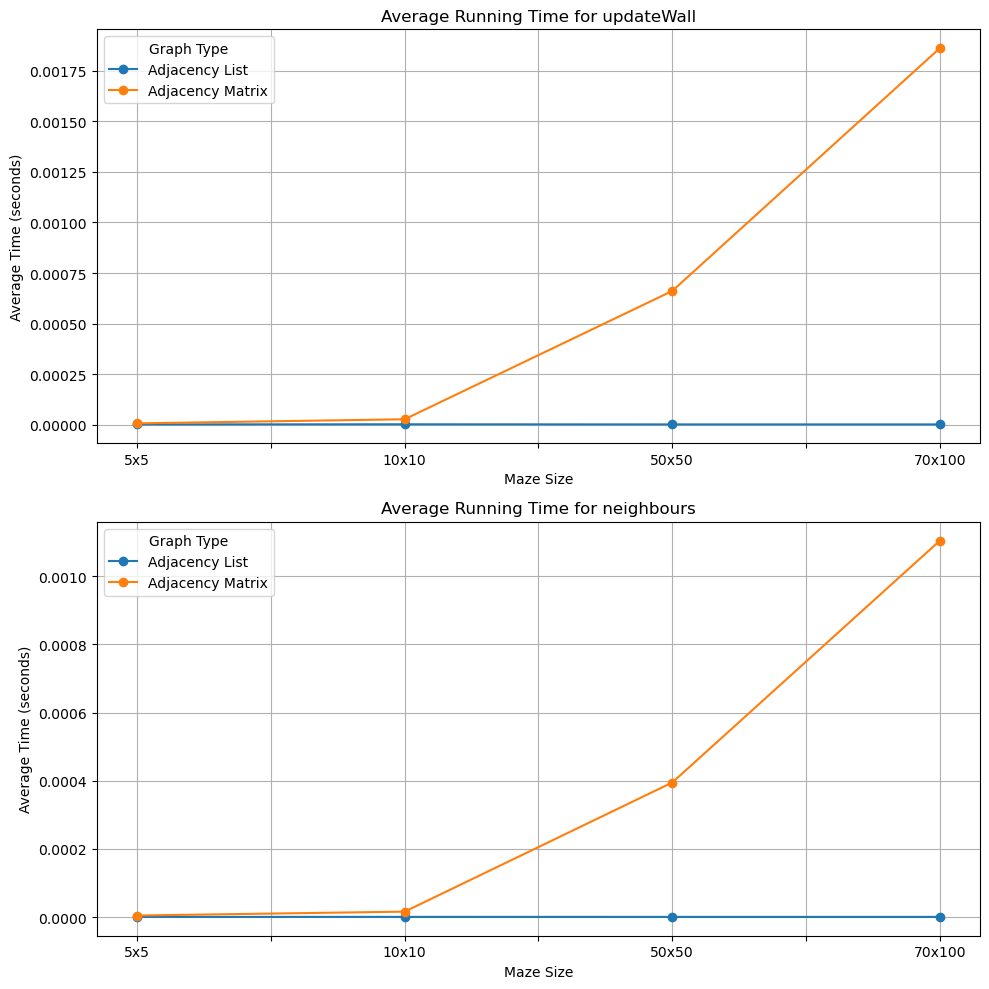

In [58]:
# Pivot the data for 'updateWall' function
pivot_update_wall = df[df['Function'] == 'updateWall'].pivot(
    index='Maze Size',
    columns='Graph Type',
    values='Average Time'
)

# Pivot the data for 'neighbours' function
pivot_neighbours = df[df['Function'] == 'neighbours'].pivot(
    index='Maze Size',
    columns='Graph Type',
    values='Average Time'
)

# Sort the index according to the desired order
sorted_index = ['5x5', '10x10', '50x50', '70x100']
pivot_update_wall = pivot_update_wall.reindex(sorted_index)
pivot_neighbours = pivot_neighbours.reindex(sorted_index)

# Create subplots with 2 rows
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot the updateWall data in the first row
pivot_update_wall.plot(ax=ax[0], kind='line', marker='o')
ax[0].set_title('Average Running Time for updateWall')
ax[0].set_xlabel('Maze Size')
ax[0].set_ylabel('Average Time (seconds)')
ax[0].grid(True)

# Plot the neighbours data in the second row
pivot_neighbours.plot(ax=ax[1], kind='line', marker='o')
ax[1].set_title('Average Running Time for neighbours')
ax[1].set_xlabel('Maze Size')
ax[1].set_ylabel('Average Time (seconds)')
ax[1].grid(True)

plt.tight_layout()
plt.show()